# Importando Ferramentas

In [35]:
# Instalando API da Base dos Dados
!pip install basedosdados

# Importando Ferramentas Básicas
import pandas             as pd
import basedosdados       as bd
import seaborn            as sns
import matplotlib.pyplot  as plt

from ipywidgets           import interact

import json

# Coloque aqui seu ID
Project_ID = 'novo-projeto-306919'

# Importando Dados

In [36]:
# Visualizando informações dos dados
bd.list_datasets()


dataset_id: 
	br_abrinq_oca 
-----------------------------------------------------------------------------------------------
dataset_id: 
	br_ana_atlas_esgotos 
-----------------------------------------------------------------------------------------------
dataset_id: 
	br_anvisa_medicamentos_industrializados 
-----------------------------------------------------------------------------------------------
dataset_id: 
	br_bd_diretorios_brasil 
-----------------------------------------------------------------------------------------------
dataset_id: 
	br_camara_atividade_legislativa 
-----------------------------------------------------------------------------------------------
dataset_id: 
	br_camara_dados_abertos 
-----------------------------------------------------------------------------------------------
dataset_id: 
	br_cgu_servidores_executivo_federal 
-----------------------------------------------------------------------------------------------
dataset_id: 
	br_geobr_mapas 
-

In [37]:
# Lendo os dados
idh_municipios = bd.read_table(dataset_id = 'mundo_onu_adh', 
                                       table_id = 'municipios',
                                       billing_project_id = Project_ID)

BaseDosDadosException: 
We are not sure which Google Cloud project should be billed.
First, you should make sure that you have a Google Cloud project.
If you don't have one, set one up following these steps: 
	1. Go to this link https://console.cloud.google.com/projectselector2/home/dashboard
	2. Agree with Terms of Service if asked
	3. Click in Create Project
	4. Put a cool name in your project
	5. Hit create
Copy the Project ID, (notice that it is not the Project Name)
Now, you have two options:
1. Add an argument to your function poiting to the billing project id.
   Like `bd.read_table('br_ibge_pib', 'municipios', billing_project_id=<YOUR_PROJECT_ID>)`
2. You can set a project_id in the environment by running the following command in your terminal: `gcloud config set project <YOUR_PROJECT_ID>`.   Bear in mind that you need `gcloud` installed.

In [ ]:
# Visualizando a tabela de IDH dos Municípios
idh_municipios.head(5)

In [ ]:
query_idh_municipios = "SELECT DISTINCT id_municipio, ano, idhm, idhm_e, idhm_l, idhm_r  FROM `basedosdados.mundo_onu_adh.municipios`;"

df_idh_municipios = bd.read_sql(query = query_idh_municipios, 
                                billing_project_id = Project_ID)

In [ ]:
df_idh_municipios.head(5)

**Dicionário de Dados**

<br>

- idhm    :  `Municipal`
- idhm_e  :  `Educação`
- idhm_l  :  `Longevidade`
- idhm_r  :  `Renda` 

In [ ]:
query_info_municipios = "SELECT DISTINCT id_municipio, municipio, capital_uf, uf, regiao, microrregiao, mesorregiao  FROM `basedosdados.br_bd_diretorios_brasil.municipio`;"

df_info_municipios = bd.read_sql(query = query_info_municipios, 
                                 billing_project_id = Project_ID)

In [ ]:
# Juntando as duas tabelas com base no ID municipal
df_total_municipios = df_idh_municipios.merge(df_info_municipios, 
                                              left_on = 'id_municipio', 
                                              right_on = 'id_municipio')

In [ ]:
# Visualizando a tabela
df_total_municipios.head(5)

# Análise Exploratória de Dados

In [ ]:
anos = [1991, 2000, 2010]

lista_medias_municipio = [df_idh_municipios.loc[df_idh_municipios["ano"]==ano, "idhm"].mean()\
                for ano in anos]

lista_medias_municipio_e = [df_idh_municipios.loc[df_idh_municipios["ano"]==ano, "idhm_e"].mean()\
                for ano in anos]

lista_medias_municipio_l = [df_idh_municipios.loc[df_idh_municipios["ano"]==ano, "idhm_l"].mean()\
                for ano in anos]

lista_medias_municipio_r = [df_idh_municipios.loc[df_idh_municipios["ano"]==ano, "idhm_r"].mean()\
                for ano in anos]


In [ ]:
fig, (ax0) = plt.subplots(nrows = 1,
                            ncols = 1,
                            figsize = (15,10),
                             sharex = True)

scatter = ax0.plot(anos, 
                   lista_medias_municipio, 
                   marker='o', 
                   label='Média')


scatter = ax0.plot(anos,lista_medias_municipio_e, 
                   c = 'red', 
                   marker='o', 
                   label='Educação')

scatter = ax0.plot(anos, 
                   lista_medias_municipio_l,
                   c = 'green', 
                   marker='o', 
                   label='Longevidade')

scatter = ax0.plot(anos, 
                   lista_medias_municipio_r, 
                   c = 'black', 
                   marker='o', 
                   label='Renda')

ax0.set(title = 'Evolução dos indicadores',
        xlabel = 'Média anual',
       ylabel = 'Ano')

ax0.legend(bbox_to_anchor = (1.04,1))


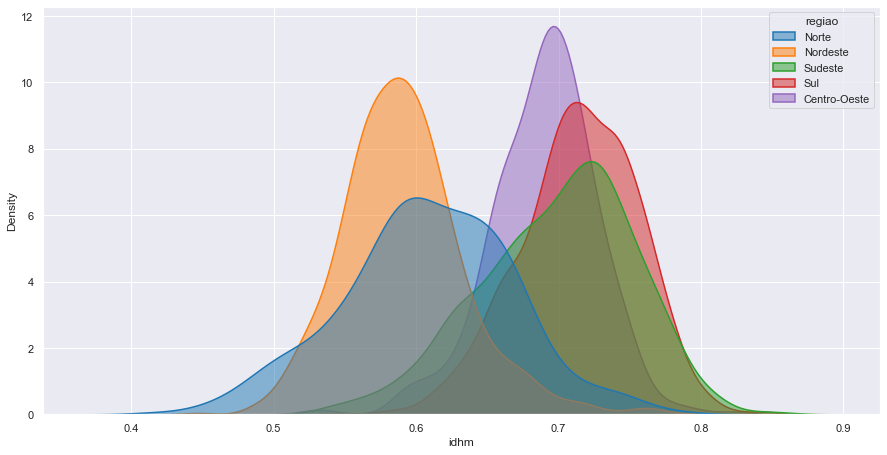

In [38]:
sns.set_theme(style="darkgrid")

fig, ax = plt.subplots(figsize = (15,7.5))

ax = sns.kdeplot(data = df_total_municipios.loc[df_total_municipios["ano"]==2010], 
                  x= "idhm",
                  hue = 'regiao',
                  palette = "tab10",
                  fill = True, 
                  common_norm = False, 
                  alpha = .5, 
                  linewidth = 1.5)



In [40]:
# Fixar escala

def f(ano):
  
    sns.set_theme(style="darkgrid")

    fig, ax = plt.subplots(figsize = (15,7.5))

    ax = sns.kdeplot(data = df_total_municipios.loc[df_total_municipios["ano"]==ano], 
                    x= "idhm",
                    hue = 'regiao',
                    palette = "tab10",
                    fill = True, 
                    common_norm = False, 
                    alpha = .5, 
                    linewidth = 1.5)

    plt.show()
    
interact(f, ano = [1991,2000,2010])

interactive(children=(Dropdown(description='ano', options=(1991, 2000, 2010), value=1991), Output()), _dom_cla…

<function __main__.f(ano)>

In [41]:
def Graf_Interativo_Ano_Regiao(Ano):
    
    sns.set_theme(style="darkgrid")

    fig, (ax0, ax1, ax2, ax3) = plt.subplots( ncols = 1,
                                            nrows = 4,
                                            figsize = (15,22),
                                            sharex = True)

    ax0 = sns.kdeplot(  data = df_total_municipios.loc[df_total_municipios["ano"] == Ano], 
                        x = "idhm",
                        hue = 'regiao',
                        palette = "rocket",
                        fill = True, 
                        common_norm = False, 
                        alpha = .5, 
                        linewidth = 1.5,
                        ax = ax0)
    
    ax0.set_title('IDH Total',
                   fontsize = 18,
                   y = 1.03)
    
    ax1 = sns.kdeplot(  data = df_total_municipios.loc[df_total_municipios["ano"] == Ano], 
                        x = "idhm_e",
                        hue = 'regiao',
                        palette = "rocket",
                        fill = True, 
                        common_norm = False, 
                        alpha = .5, 
                        linewidth = 1.5,
                        ax = ax1)
    
    ax1.set_title('IDH Escolar',
                   fontsize = 18,
                   y = 1.03)
    
    ax2 = sns.kdeplot(  data = df_total_municipios.loc[df_total_municipios["ano"] == Ano], 
                        x = "idhm_l",
                        hue = 'regiao',
                        palette = "rocket",
                        fill = True, 
                        common_norm = False, 
                        alpha = .5, 
                        linewidth = 1.5,
                        ax = ax2)
    
    ax2.set_title('IDH Longevidade',
                   fontsize = 18,
                   y = 1.03)
    
    ax3 = sns.kdeplot(  data = df_total_municipios.loc[df_total_municipios["ano"] == Ano], 
                        x = "idhm_r",
                        hue = 'regiao',
                        palette = "rocket",
                        fill = True, 
                        common_norm = False, 
                        alpha = .5, 
                        linewidth = 1.5,
                        ax = ax3)
    
    ax3.set_title('IDH Renda',
                   fontsize = 18,
                   y = 1.03)
    

    fig.suptitle('Distribuição de IDH Municipal', 
                 fontsize = 25, 
                 fontweight = 'bold', 
                 y = 0.92)
    
    ax1.legend_ = None
    ax2.legend_ = None
    ax3.legend_ = None
    
    ax0.legend(labels = ['Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro-Oeste'],
               title="Região",
               loc= 0, 
               fontsize='medium', 
               fancybox= True,
               bbox_to_anchor=(0.5, 0.8, 0.5, 0.5),
               edgecolor  = '#FFFFFF',
               title_fontsize = 'large')
    
    ax0.set_ylabel('Densidade', fontsize = 15, y = 0.5)
    ax1.set_ylabel('Densidade', fontsize = 15, y = 0.5)
    ax2.set_ylabel('Densidade', fontsize = 15, y = 0.5)
    ax3.set_ylabel('Densidade', fontsize = 15, y = 0.5)
    
    plt.xlabel('IDH', fontsize = 15, x = 0.5)

    plt.show();

interact(Graf_Interativo_Ano_Regiao, Ano = [1991,2000, 2010])

interactive(children=(Dropdown(description='Ano', options=(1991, 2000, 2010), value=1991), Output()), _dom_cla…

<function __main__.Graf_Interativo_Ano_Regiao(Ano)>

In [54]:
query_tesouro_finbra = "SELECT id_municipio, populacao, conta, valor FROM `basedosdados.br_tesouro_finbra.despesas_por_funcao`;"

df_tesouro_finbra = bd.read_sql(query=query_tesouro_finbra, billing_project_id='steam-snowfall-306819')


Downloading: 100%|██████████████████████████████████████████████████████| 6751048/6751048 [04:16<00:00, 26301.85rows/s]


In [55]:
df_tesouro_finbra

,id_municipio,populacao,conta,valor
0,1100015,25578,Legislativa,2208379.60
1,1100015,25578,Ação Legislativa,2208379.60
2,1100015,25578,Administração,10046057.19
3,1100015,25578,Administração Geral,10011124.05
4,1100015,25578,Tecnologia da Informação,34933.14
...,...,...,...,...
6751043,5222302,5460,Transporte Rodoviário,236851.63
6751044,5222302,5460,Desporto e Lazer,39402.91
6751045,5222302,5460,Lazer,39402.91
6751046,5222302,5460,Encargos Especiais,220247.94


In [ ]:
Desenvolvimento Científico
Desenvolvimento Tecnológico e Engenharia

In [ ]:
with open("./imports/id_municipios.json", mode="r") as f:
  ID_MUN = json.load(f)

FileNotFoundError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ID_MUN["1100015"]

NameError: ignored

# Testes

In [ ]:
despesas_orcamentarias = bd.read_table(dataset_id='br_tesouro_finbra', 
                                       table_id='despesas_orcamentarias', 
                                       billing_project_id='steam-snowfall-306819')


Downloading: 100%|██████████████████████████████████████████████████████| 5763724/5763724 [06:38<00:00, 14464.53rows/s]


In [ ]:
despesas_orcamentarias.head(5)

,id_municipio,sigla_uf,ano,populacao,coluna,id_conta,conta,valor
0,1100015,RO,2014,25652,Despesas Empenhadas,3.3.90.49.00.00,Auxílio-Transporte,166832.00
1,1100015,RO,2014,25652,Despesas Liquidadas,3.3.90.49.00.00,Auxílio-Transporte,166832.00
2,1100015,RO,2014,25652,Despesas Pagas,3.3.90.49.00.00,Auxílio-Transporte,166832.00
3,1100031,RO,2014,6424,Despesas Empenhadas,3.3.20.00.00.00,Transferências à União,71701.78
4,1100031,RO,2014,6424,Despesas Empenhadas,3.3.30.81.00.00,Distribuição Constitucional ou Legal de Receitas,235376.73


# Descrição dos dados

- **Despesa Empenhada**: Valor do orçamento público formalmente reservado (pela emissão do empenho) para compromissos assumidos com terceiros.
	
- **Despesa Liquidada**: É a verificação do direito adquirido pelo credor de receber o pagamento. É o segundo estágio da execução da despesa, precedido do empenho e antecedido do pagamento.

In [ ]:
despesas_orcamentarias.to_csv('./Dados/despesas_orcamentarias.csv',sep=';',index=False)

In [ ]:
despesas_orcamentarias.shape

(5763724, 8)

In [ ]:
despesas_orcamentarias["conta"].value_counts().keys()[:50]

Index(['Aplicações Diretas', 'Outros Serviços de Terceiros - Pessoa Jurídica',
       'Despesas Correntes', 'Outras Despesas Correntes',
       'Material de Consumo', 'Despesas de Capital', 'Investimentos',
       'Pessoal e Encargos Sociais',
       'Outros Serviços de Terceiros - Pessoa Física',
       'Total Geral da Despesa', 'Equipamentos e Material Permanente',
       'Obras e Instalações', 'Despesas de Exercícios Anteriores',
       'Obrigações Patronais', 'Vencimentos e Vantagens Fixas - Pessoal Civil',
       'Sentenças Judiciais', 'Obrigações Tributárias e Contributivas',
       'Material, Bem ou Serviço para Distribuição Gratuita',
       'Diárias - Civil', 'Amortização da Dívida',
       'Indenizações e Restituições',
       'Transferências a Consórcios Públicos mediante contrato de rateio',
       'Contribuições Previdenciárias - INSS',
       'Principal da Dívida Contratual Resgatado',
       'Contratação por Tempo Determinado',
       'Transferências a Instituições Priva

In [ ]:
despesas_orcamentarias["coluna"].value_counts()

Despesas Empenhadas                            1517018
Despesas Liquidadas                            1514346
Despesas Pagas                                 1510567
Inscrição de RP Processados                     407857
Inscrição de Restos a Pagar Processados         329771
Inscrição de RP Não Processados                 267706
Inscrição de Restos a Pagar Não Processados     216459
Name: coluna, dtype: int64